In [1]:

# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files
# Get Data From SQL Database 
import sqlalchemy 
# Import get_engine function from sql_functions.py and set it to a variable called engine
from sql_functions import get_engine 

In [2]:
# Import the Information about the schema & table name
schema = 'capstone_wildfire' 
table_name = 'combined_weather_data_v4'
engine = get_engine()

Get fire_data as WF & weather_data as DF


In [3]:

# SQL query to load data from table/ SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.combined_weather_data_v4"

# Retrieve data from the database and load it into a DataFrame/Daten aus der Datenbank abrufen und in ein DataFrame laden
df = pd.read_sql_query(sql_query, engine)

# Show DataFrame/ DataFrame anzeigen
print(df)

             date  average_temp_c  minimum_temp_c  maximum_temp_c  \
0      2011-09-17             NaN             NaN             NaN   
1      2011-06-08            29.6            22.2            36.1   
2      2005-01-31             NaN             NaN             NaN   
3      2012-04-22             NaN             NaN             NaN   
4      2012-04-24             NaN             NaN             NaN   
...           ...             ...             ...             ...   
550409 2012-04-16             NaN             NaN             NaN   
550410 2011-06-06            30.9            23.9            35.6   
550411 2012-04-19             NaN             NaN             NaN   
550412 2011-09-12             NaN             NaN             NaN   
550413 2011-06-07            29.2            21.1            35.6   

        precipitation_mm  snow_mm  wind_direction_deg  windspeed_kmh  \
0                    NaN      NaN                 NaN            NaN   
1                    0.0   

In [4]:
# SQL query to load data from table
sql_query_wf = "SELECT * FROM capstone_wildfire.fires_data_v1_rdy_to_clean_rows"

# Retrieve data from the database and load it into a DataFrame
wf = pd.read_sql_query(sql_query_wf, engine)

# Show DataFrame
wf

,unique_id,source_reporting_unit_name,gov_firecode,fire_name,cause_code,cause_descr,fire_size,fire_size_class,latitude,longitude,county,shape_hex,combined_control_date,combined_discovery_date,burning_time,state_name
0,19961252,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,12.0,C,35.590000,-86.820000,Marshall,\x0001ad10000010ae47e17ab455c0f051b81e85cb4140...,2005-08-24 18:00:00,2005-08-24 15:30:00,0.0,Tennessee
1,19961253,Tennessee Division of Forestry,undefined,undefined,1,Lightning,0.5,B,35.376667,-87.600000,Wayne,\x0001ad1000006466666666e655c008ff4a9d36b04140...,2005-08-02 17:00:00,2005-08-02 15:45:00,0.0,Tennessee
2,19961254,Tennessee Division of Forestry,undefined,undefined,10,Fireworks,0.1,A,35.096667,-86.480000,Lincoln,\x0001ad1000001c85eb51b89e55c0688e0d935f8c4140...,2005-09-04 18:30:00,2005-09-04 17:15:00,0.0,Tennessee
3,19961255,Tennessee Division of Forestry,undefined,undefined,3,Smoking,8.0,B,35.145000,-86.663333,Lincoln,\x0001ad1000004076830d74aa55c0c8f5285c8f924140...,2005-09-11 16:45:00,2005-09-11 15:20:00,0.0,Tennessee
4,19961257,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,2.0,B,35.156667,-86.500000,Lincoln,\x0001ad100000fcffffffff9f55c0b06f88a70d944140...,2005-09-05 14:00:00,2005-09-05 00:00:00,0.0,Tennessee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674433,19961247,Tennessee Division of Forestry,undefined,undefined,8,Children,0.5,B,35.036667,-87.368333,Lawrence,\x0001ad100000c461d5c592d755c020ad927eb1844140...,2005-07-05 17:10:00,2005-07-05 15:00:00,0.0,Tennessee
1674434,19961248,Tennessee Division of Forestry,undefined,undefined,7,Arson,20.0,C,35.120000,-88.265000,Hardin,\x0001ad100000285c8fc2f51056c098c2f5285c8f4140...,2005-08-11 19:00:00,2005-08-11 18:00:00,0.0,Tennessee
1674435,19961249,Tennessee Division of Forestry,undefined,undefined,5,Debris Burning,2.0,B,35.176667,-87.348333,Lawrence,\x0001ad100000e4e6c0174bd655c07065b1039d964140...,2005-08-22 16:30:00,2005-08-22 15:30:00,0.0,Tennessee
1674436,19961250,Tennessee Division of Forestry,undefined,undefined,12,Structure,0.1,A,35.820000,-87.633333,Hickman,\x0001ad100000ecbd648888e855c0305c8fc2f5e84140...,2005-08-20 19:10:00,2005-08-20 16:20:00,0.0,Tennessee


In [5]:
from scipy.stats import pearsonr, spearmanr, linregress, f_oneway

In [6]:
# Group 'df' data by 'date' and calculate the daily average temperature
df_avg_temp = df.groupby(df['date'].dt.date)['average_temp_c'].mean().reset_index()

In [7]:
# Select the 'average_temp_c' column from the weather dataset
df_avg_temp = df_avg_temp[['date', 'average_temp_c']]

In [8]:
# Create a new column 'day' by extracting the day from the date
wf['day'] = wf['combined_discovery_date'].dt.date

In [9]:
# Count the number of unique wildfires discovered on each day
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']

In [11]:
# ????????????

# Merge daily average temperature and wildfire data on the 'Day' column
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

#This code will give you one 'weather data point' per day with the daily average temperature 
#for all 71 weather stations and the corresponding number of wildfires discovered on each day. 
#This merged data can then be used for Pearson Correlation analysis.

In [12]:
# Remove rows with missing values (NaN) in either column
merged_data = merged_data.dropna(subset=['average_temp_c', 'Number of Wildfires'])

In [55]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7670 entries, 0 to 7669
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 7670 non-null   object 
 1   average_temp_c       7670 non-null   float64
 2   Day                  7670 non-null   object 
 3   Number of Wildfires  7670 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 299.6+ KB


In [13]:
# ursprünglichen DataFrames wf und df  unverändert, neue DataFrames zum Beispiel wf_california und df_california enthalten nur Daten, die sich auf Kalifornien beziehen.
# Dadurch werden nur die Zeilen in beiden DataFrames beibehalten, in denen der Wert in der Spalte 'states' oder 'state_name' gleich 'California' ist. 
# Analysen auf die reduzierten DataFrames ('wf_california' und 'df_california') anwenden, um sich auf Kalifornien zu beziehen. Bei den anderen genauso.

wf_california = wf[wf['state_name'] == 'California']
wf_oregon = wf[wf['state_name'] == 'Oregon']
wf_idaho = wf[wf['state_name'] == 'Idaho']
wf_newmexico = wf[wf['state_name'] == 'New Mexico']
wf_arizona = wf[wf['state_name'] == 'Arizona']

df_california = df[df['states'] == 'California']
df_oregon = df[df['states'] == 'Oregon']
df_idaho = df[df['states'] == 'Idaho']
df_newmexico = df[df['states'] == 'New Mexico']
df_arizona = df[df['states'] == 'Arizona']

In [14]:
# Assuming 'date' column in df_california etc. is not datetime, convert it to datetime
df_california['date'] = pd.to_datetime(df['date'])
df_oregon['date'] = pd.to_datetime(df['date'])
df_idaho['date'] = pd.to_datetime(df['date'])
df_newmexico['date'] = pd.to_datetime(df['date'])
df_arizona['date'] = pd.to_datetime(df['date'])


/var/folders/df/g1_f7491303cfrx5n8tynkv40000gn/T/ipykernel_77453/3594619813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california['date'] = pd.to_datetime(df['date'])
/var/folders/df/g1_f7491303cfrx5n8tynkv40000gn/T/ipykernel_77453/3594619813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oregon['date'] = pd.to_datetime(df['date'])
/var/folders/df/g1_f7491303cfrx5n8tynkv40000gn/T/ipykernel_77453/3594619813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [15]:
# Group 'df_california' etc. data by 'date' and calculate the daily average temperature
# hier erstelle ich einen neuen DataFrame daily_avg_temp_california 
daily_avg_temp_california = df_california.groupby(df_california['date'].dt.date)['average_temp_c'].mean().reset_index()
daily_avg_temp_oregon= df_oregon.groupby(df_oregon['date'].dt.date)['average_temp_c'].mean().reset_index()
daily_avg_temp_idaho = df_idaho.groupby(df_idaho['date'].dt.date)['average_temp_c'].mean().reset_index()
daily_avg_temp_newmexico = df_newmexico.groupby(df_newmexico['date'].dt.date)['average_temp_c'].mean().reset_index()
daily_avg_temp_arizona = df_arizona.groupby(df_arizona['date'].dt.date)['average_temp_c'].mean().reset_index()

In [16]:
# # Filter 'df_california' etc. data for the specified time frame (1995-2015)
# df_california = df_california[(df_california['date'].dt.year >= 1995) & (df_california['date'].dt.year <= 2015)]
# df_oregon = df_oregon[(df_oregon['date'].dt.year >= 1995) & (df_oregon['date'].dt.year <= 2015)]
# df_idaho = df_idaho[(df_idaho['date'].dt.year >= 1995) & (df_idaho['date'].dt.year <= 2015)]
# df_newmexico = df_newmexico[(df_newmexico['date'].dt.year >= 1995) & (df_newmexico['date'].dt.year <= 2015)]
# df_arizona = df_arizona[(df_arizona['date'].dt.year >= 1995) & (df_arizona['date'].dt.year <= 2015)]

In [17]:
# Select the 'average_temp_c' column from the weather dataset
df_california = df_california[['date', 'average_temp_c']]
df_oregon = df_oregon[['date', 'average_temp_c']]
df_idaho = df_idaho[['date', 'average_temp_c']]
df_newmexico = df_newmexico[['date', 'average_temp_c']]
df_arizona = df_arizona[['date', 'average_temp_c']]

In [18]:
# # Filter wildfire data for the same time frame
# wf_california = wf_california[(wf_california['combined_discovery_date'].dt.year >= 1995) & (wf_california['combined_discovery_date'].dt.year <= 2015)]
# wf_oregon = wf_oregon[(wf_oregon['combined_discovery_date'].dt.year >= 1995) & (wf_oregon['combined_discovery_date'].dt.year <= 2015)]
# wf_idaho = wf_idaho[(wf_idaho['combined_discovery_date'].dt.year >= 1995) & (wf_idaho['combined_discovery_date'].dt.year <= 2015)]
# wf_newmexico = wf_newmexico[(wf_newmexico['combined_discovery_date'].dt.year >= 1995) & (wf_newmexico['combined_discovery_date'].dt.year <= 2015)]
# wf_arizona = wf_arizona[(wf_arizona['combined_discovery_date'].dt.year >= 1995) & (wf_arizona['combined_discovery_date'].dt.year <= 2015)]

In [19]:
# # Create a new column 'day' by extracting the day from the date
# wf_california = wf_california[(wf_california['combined_discovery_date'].dt.year >= 1995) & (wf_california['combined_discovery_date'].dt.year <= 2015)]
# wf_oregon = wf_oregon[(wf_oregon['combined_discovery_date'].dt.year >= 1995) & (wf_oregon['combined_discovery_date'].dt.year <= 2015)]
# wf_idaho = wf_idaho[(wf_idaho['combined_discovery_date'].dt.year >= 1995) & (wf_idaho['combined_discovery_date'].dt.year <= 2015)]
# wf_newmexico = wf_newmexico[(wf_newmexico['combined_discovery_date'].dt.year >= 1995) & (wf_newmexico['combined_discovery_date'].dt.year <= 2015)]
# wf_arizona = wf_arizona[(wf_arizona['combined_discovery_date'].dt.year >= 1995) & (wf_arizona['combined_discovery_date'].dt.year <= 2015)]

In [20]:

wf_california['day'] = wf_california['combined_discovery_date'].dt.date
wf_oregon['day'] = wf_oregon['combined_discovery_date'].dt.date
wf_idaho['day'] = wf_idaho['combined_discovery_date'].dt.date
wf_newmexico['day'] = wf_newmexico['combined_discovery_date'].dt.date
wf_arizona['day'] = wf_arizona['combined_discovery_date'].dt.date

In [21]:
# Count the number of unique wildfires discovered on each day
# wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
# wf_agg.columns = ['Day', 'Number of Wildfires']

daily_unique_wildfires = wf_california.groupby('day')['unique_id'].nunique()
daily_unique_wildfires_oregon = wf_oregon.groupby('day')['unique_id'].nunique()
daily_unique_wildfires_idaho = wf_idaho.groupby('day')['unique_id'].nunique()
daily_unique_wildfires_newmexico = wf_newmexico.groupby('day')['unique_id'].nunique()
daily_unique_wildfires_arizona = wf_arizona.groupby('day')['unique_id'].nunique()


In [22]:
# Group 'df_california' Daten nach 'date' und berechnen Sie die tägliche Durchschnittstemperatur
df_avg_temp_california = df_california.groupby(df_california['date'].dt.date)['average_temp_c'].mean().reset_index()
df_avg_temp_oregon = df_oregon.groupby(df_oregon['date'].dt.date)['average_temp_c'].mean().reset_index()
df_avg_temp_idaho = df_idaho.groupby(df_idaho['date'].dt.date)['average_temp_c'].mean().reset_index()
df_avg_temp_newmexico = df_newmexico.groupby(df_newmexico['date'].dt.date)['average_temp_c'].mean().reset_index()
df_avg_temp_arizona = df_arizona.groupby(df_arizona['date'].dt.date)['average_temp_c'].mean().reset_index()


# Setzen Sie die Spaltennamen zurück, um 'date' in 'day' zu ändern
df_avg_temp_california.columns = ['day', 'average_temp_c']
df_avg_temp_oregon.columns = ['day', 'average_temp_c']
df_avg_temp_idaho.columns = ['day', 'average_temp_c']
df_avg_temp_newmexico.columns = ['day', 'average_temp_c']
df_avg_temp_arizona.columns = ['day', 'average_temp_c']

In [23]:
# Daten gruppieren nach 'day' und Anzahl der eindeutigen Waldbrände pro Tag zählen
daily_unique_wildfires_california = wf_california.groupby('day')['unique_id'].nunique().reset_index()
daily_unique_wildfires_oregon_o = wf_oregon.groupby('day')['unique_id'].nunique().reset_index()
daily_unique_wildfires_idaho_i = wf_idaho.groupby('day')['unique_id'].nunique().reset_index()
daily_unique_wildfires_newmexico_n = wf_newmexico.groupby('day')['unique_id'].nunique().reset_index()
daily_unique_wildfires_arizona_a = wf_arizona.groupby('day')['unique_id'].nunique().reset_index()

# Setzen Sie die Spaltennamen zurück, um 'day' in 'date' zu ändern
daily_unique_wildfires_california.columns = ['date', 'Number of Wildfires']
daily_unique_wildfires_oregon_o.columns = ['date', 'Number of Wildfires']
daily_unique_wildfires_idaho_i.columns = ['date', 'Number of Wildfires']
daily_unique_wildfires_newmexico_n.columns = ['date', 'Number of Wildfires']
daily_unique_wildfires_arizona_a.columns = ['date', 'Number of Wildfires']

# neue DataFrames 'daily_unique_wildfires_california' etc. mit der Anzahl der eindeutigen Waldbrände pro Tag in z.B. Kalifornien.


In [24]:
# Merge daily average temperature and wildfire data on different date columns
merged_data_california = pd.merge(df_avg_temp_california, daily_unique_wildfires_california, left_on='day', right_on='date')
merged_data_oregon = pd.merge(df_avg_temp_oregon, daily_unique_wildfires_oregon_o, left_on='day', right_on='date')
merged_data_idaho = pd.merge(df_avg_temp_idaho, daily_unique_wildfires_idaho_i, left_on='day', right_on='date')
merged_data_newmexico = pd.merge(df_avg_temp_newmexico, daily_unique_wildfires_newmexico_n, left_on='day', right_on='date')
merged_data_arizona = pd.merge(df_avg_temp_arizona, daily_unique_wildfires_arizona_a, left_on='day', right_on='date')

#Dieser Code wird die DataFrames basierend auf den unterschiedlichen Spalten 'day' und 'date' zusammenführen.

In [54]:
merged_data_california

,day,average_temp_c,date,Number of Wildfires,Temp Block
0,1995-01-01,10.400000,1995-01-01,1,"(5, 15]"
1,1995-01-02,9.975000,1995-01-02,4,"(5, 15]"
2,1995-01-03,11.100000,1995-01-03,2,"(5, 15]"
3,1995-01-04,10.633333,1995-01-04,3,"(5, 15]"
4,1995-01-05,11.740000,1995-01-05,3,"(5, 15]"
...,...,...,...,...,...
7302,2015-12-27,6.257143,2015-12-27,2,"(5, 15]"
7303,2015-12-28,6.814286,2015-12-28,4,"(5, 15]"
7304,2015-12-29,6.814286,2015-12-29,3,"(5, 15]"
7305,2015-12-30,7.257143,2015-12-30,1,"(5, 15]"


In [25]:
# Remove rows with missing values (NaN) in either column
merged_data_california = merged_data_california.dropna(subset=['average_temp_c', 'Number of Wildfires'])
merged_data_oregon = merged_data_oregon.dropna(subset=['average_temp_c', 'Number of Wildfires'])
merged_data_idaho = merged_data_idaho.dropna(subset=['average_temp_c', 'Number of Wildfires'])
merged_data_newmexico = merged_data_newmexico.dropna(subset=['average_temp_c', 'Number of Wildfires'])
merged_data_arizona = merged_data_arizona.dropna(subset=['average_temp_c', 'Number of Wildfires'])

Pearson-Korrelationskoeffizient und  P-Wert

CALIFORNIA 


In [59]:
# Importieren der benötigten Bibliotheken
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Angenommen, Sie haben bereits das DataFrame 'merged_data_california' erstellt, das die erforderlichen Daten enthält.

# Extrahieren der relevanten Spalten aus 'merged_data_california'
temperature_data = merged_data_california['average_temp_c']
wildfire_count = merged_data_california['Number of Wildfires']

# Berechnen der Pearson-Korrelation und des p-Werts
correlation, p_value = pearsonr(temperature_data, wildfire_count)

# Ausgabe der Korrelation und des p-Werts
print(f"Pearson-Korrelation: {correlation}")
print(f"P-Wert: {p_value}")

# Interpretieren Sie das Ergebnis basierend auf dem p-Wert. Ein kleiner p-Wert (< 0,05) deutet auf eine signifikante Korrelation hin.

Pearson-Korrelation: 0.6595116363659939
P-Wert: 0.0


KORREKTUR VON P-WERT FÜR CALIFORNIA

In [60]:
import numpy as np
from scipy import stats

# Annahme: Sie haben bereits Korrelationskoeffizienten berechnet und den P-Wert erhalten
corr_coefficient = 0.6595116363659939
# Hier ist der ursprüngliche P-Wert, den Sie erhalten haben

# WICHTIG WICHTIG WICHTIG
# Wenn der P-Wert genau 0 ist, setzen Sie ihn auf einen sehr kleinen Wert
if p_value == 0.0:
    p_value = np.finfo(float).tiny

# Jetzt haben Sie einen kleinen P-Wert, der nahe bei Null liegt, aber nicht genau Null
print(f"Korrelationskoeffizient (Pearson): {corr_coefficient}")
print(f"P-Wert (Pearson): {p_value}")

#Bitte beachten , dass dies eine gängige Vorgehensweise ist, wenn Sie auf einen P-Wert von exakt 0 stoßen, aber es ist wichtig zu verstehen, dass dieser Wert nicht genau Null ist. 
# Es ist eine numerische Annäherung an einen sehr kleinen Wert.

Korrelationskoeffizient (Pearson): 0.6595116363659939
P-Wert (Pearson): 2.2250738585072014e-308


In [26]:
from scipy import stats #stats module

In [47]:
corr_coefficient, p_value = stats.pearsonr(merged_data_california['average_temp_c'], merged_data_california['Number of Wildfires'])


In [48]:
# Print the results
#print(f"Pearson Correlation Coefficient: {corr_coefficient}")
#print(f"P-Value: {p_value}")
print("Pearson-Korrelationskoeffizient für Kalifornien:", corr_coefficient)
print("p-Wert für Kalifornien:", p_value)

Pearson-Korrelationskoeffizient für Kalifornien: 0.6595116363659939
p-Wert für Kalifornien: 0.0


OREGON

In [52]:
# Importieren der benötigten Bibliotheken
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Angenommen, Sie haben bereits das DataFrame 'merged_data_california' erstellt, das die erforderlichen Daten enthält.

# Extrahieren der relevanten Spalten aus 'merged_data_california'
temperature_data = merged_data_oregon['average_temp_c']
wildfire_count = merged_data_oregon['Number of Wildfires']

# Berechnen der Pearson-Korrelation und des p-Werts
correlation, p_value_oregon = pearsonr(temperature_data, wildfire_count)

# Ausgabe der Korrelation und des p-Werts
print(f"Pearson-Korrelation: {correlation}")
print(f"P-Wert: {p_value_oregon}")

# Interpretieren Sie das Ergebnis basierend auf dem p-Wert. Ein kleiner p-Wert (< 0,05) deutet auf eine signifikante Korrelation hin.

Pearson-Korrelation: 0.4209657037235891
P-Wert: 1.3086549740194152e-196


In [53]:
# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value_oregon < alpha:
    print("There is a significant correlation between daily higher temperatures and the number of unique wildfires.")
else:
    print("There is no significant correlation between daily higher temperatures and the number of unique wildfires.")

There is a significant correlation between daily higher temperatures and the number of unique wildfires.


IDAHO

In [32]:
# IDAHO
from scipy import stats

# Berechnen Sie den Pearson-Korrelationskoeffizienten und den p-Wert neu
corr_coefficient, p_value = stats.pearsonr(merged_data_idaho['average_temp_c'], merged_data_idaho['Number of Wildfires'])

print("Pearson-Korrelationskoeffizient für Idaho:", corr_coefficient)
print("p-Wert für Idaho:", p_value)

Pearson-Korrelationskoeffizient für Idaho: 0.4215444385576765
p-Wert für Idaho: 6.772773392945824e-160


NEW MEXICO

In [33]:
from scipy import stats

# Berechnen Sie den Pearson-Korrelationskoeffizienten und den p-Wert neu
corr_coefficient, p_value = stats.pearsonr(merged_data_newmexico['average_temp_c'], merged_data_newmexico['Number of Wildfires'])

print("Pearson-Korrelationskoeffizient für New Mexico:", corr_coefficient)
print("p-Wert für New Mexico:", p_value)

Pearson-Korrelationskoeffizient für New Mexico: 0.4301281346983329
p-Wert für New Mexico: 1.4918540350074306e-255


ARIZONA

In [34]:
from scipy import stats

# Berechnen Sie den Pearson-Korrelationskoeffizienten und den p-Wert neu
corr_coefficient, p_value_arizona = stats.pearsonr(merged_data_arizona['average_temp_c'], merged_data_arizona['Number of Wildfires'])

print("Pearson-Korrelationskoeffizient für Arizona:", corr_coefficient)
print("p-Wert für Arizona:", p_value_arizona)

Pearson-Korrelationskoeffizient für Arizona: 0.49441910023955804
p-Wert für Arizona: 0.0


In [35]:
# für arizona, weil bei arizona p-wert wie bei california 0.0 ist

import numpy as np
from scipy import stats

# Annahme: Sie haben bereits Korrelationskoeffizienten berechnet und den P-Wert erhalten
corr_coefficient = 0.49441910023955804
p_value_arizona = 0.0  # Hier ist der ursprüngliche P-Wert, den Sie erhalten haben

# WICHTIG WICHTIG WICHTIG
# Wenn der P-Wert genau 0 ist, setzen Sie ihn auf einen sehr kleinen Wert
if p_value_arizona == 0.0:
    p_value_arizona = np.finfo(float).tiny

# Jetzt haben Sie einen kleinen P-Wert, der nahe bei Null liegt, aber nicht genau Null
print(f"Korrelationskoeffizient (Pearson) für Arizona: {corr_coefficient}")
print(f"P-Wert (Pearson) für Arizona : {p_value_arizona}")

#Bitte beachten , dass dies eine gängige Vorgehensweise ist, wenn Sie auf einen P-Wert von exakt 0 stoßen, 
# aber es ist wichtig zu verstehen, dass dieser Wert nicht genau Null ist. 
# Es ist eine numerische Annäherung an einen sehr kleinen Wert.

Korrelationskoeffizient (Pearson) für Arizona: 0.49441910023955804
P-Wert (Pearson) für Arizona : 2.2250738585072014e-308


PLOTTING

VISUALISIERUNG CALIFORNIA


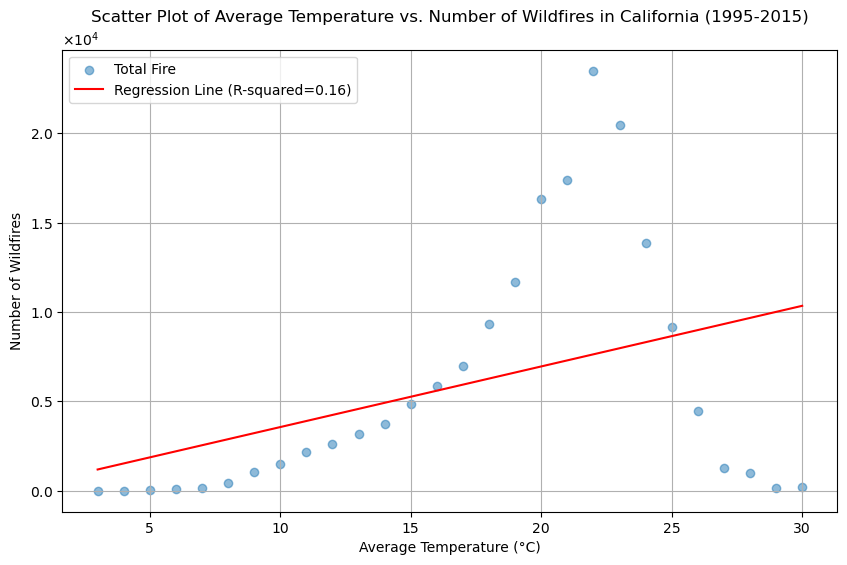

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import ScalarFormatter

# Convert the 'date' column to datetime format
merged_data_california['date'] = pd.to_datetime(merged_data_california['date'])

# Filter the data for California and the specified time frame (1995-2015)
california_data = merged_data_california[(merged_data_california['date'].dt.year >= 1995) & (merged_data_california['date'].dt.year <= 2015)]

# Round temperatures to the nearest integer
california_data['average_temp_c_rounded'] = california_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = california_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c',
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Format the y-axis to display in scientific notation 
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Provided Pearson Correlation Coefficient and P-Value
#pearson_corr_coeff = 0.6595116363659939
#p_value = 2.2250738585072014e-308

plt.scatter(x, y, label=f'Total Fire', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires in California (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the provided Pearson Correlation Coefficient and P-Value
#plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
#plt.annotate(f'P-Value: {p_value:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

# # Check if the correlation is statistically significant at a significance level of 0.05
# alpha = 0.05
# if p_value < alpha:
#     significance_message = "There is a significant correlation between daily higher temperatures and the number of unique wildfires."
# else:
#     significance_message = "There is no significant correlation between daily higher temperatures and the number of unique wildfires."

#plt.annotate(significance_message, (0.1, 0.75), xycoords='axes fraction', fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()


In [65]:
# Round temperatures to the nearest integer
california_data['average_temp_c_rounded'] = california_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = california_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

average_temp_c_rounded

,average_temp_c_rounded,Number of Wildfires
0,3,13
1,4,7
2,5,60
3,6,121
4,7,148
5,8,457
6,9,1028
7,10,1475
8,11,2168
9,12,2594


In [66]:
california_data
#7296 Reihe, nicht tage
# 20 jahre durch 7296 = 365 Tage 
# jede reihe ein tag, jeder tag hat eine aufgerundete temperatur
# wieviel temp bei 0 grad, bei 1 grad etc
# regressionslinie =  trendlinie
# corellation = beziehung  


,day,average_temp_c,date,Number of Wildfires,average_temp_c_rounded
0,1995-01-01,10.400000,1995-01-01,1,10
1,1995-01-02,9.975000,1995-01-02,4,10
2,1995-01-03,11.100000,1995-01-03,2,11
3,1995-01-04,10.633333,1995-01-04,3,11
4,1995-01-05,11.740000,1995-01-05,3,12
...,...,...,...,...,...
7302,2015-12-27,6.257143,2015-12-27,2,6
7303,2015-12-28,6.814286,2015-12-28,4,7
7304,2015-12-29,6.814286,2015-12-29,3,7
7305,2015-12-30,7.257143,2015-12-30,1,7


VISUALISIERUNGEN


    Oregon 132

    Idaho 132

    New Mexico 125

    Arizona 125

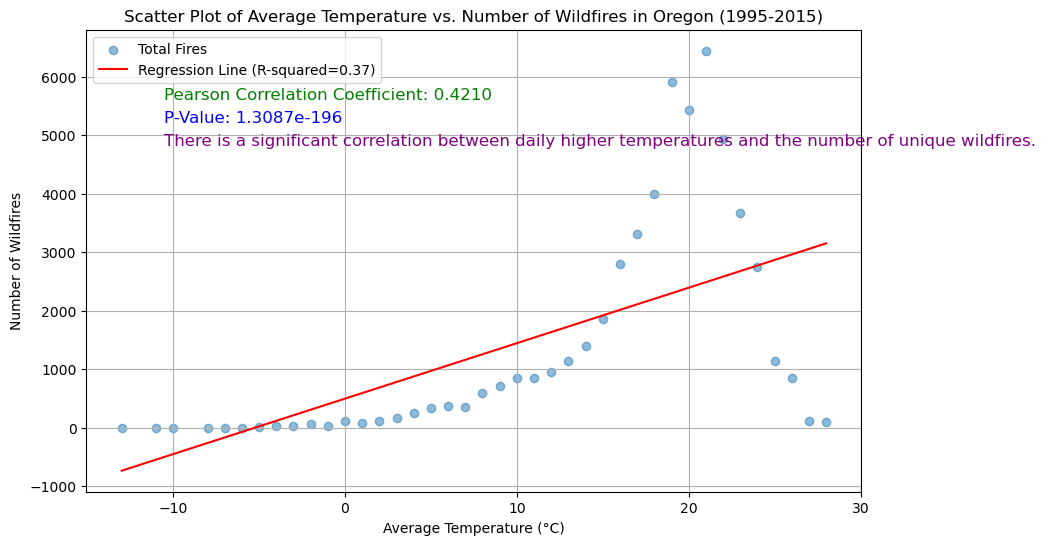

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the 'date' column to datetime format
merged_data_oregon['date'] = pd.to_datetime(merged_data_oregon['date'])

# Filter the data for oregon and the specified time frame (1995-2015)
oregon_data = merged_data_oregon[(merged_data_oregon['date'].dt.year >= 1995) & (merged_data_oregon['date'].dt.year <= 2015)]

# Round temperatures to the nearest integer
oregon_data['average_temp_c_rounded'] = oregon_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = oregon_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c',
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Provided Pearson Correlation Coefficient and P-Value
#Pearson-Korrelationskoeffizient für Oregon: 0.4209657037235891
#p-Wert für Oregon: 1.3086549740194152e-196
pearson_corr_coeff = 0.4209657037235891
p_value = 1.3086549740194152e-196

plt.scatter(x, y, label=f'Total Fires', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires in Oregon (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the provided Pearson Correlation Coefficient and P-Value
plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'P-Value: {p_value:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    significance_message = "There is a significant correlation between daily higher temperatures and the number of unique wildfires."
else:
    significance_message = "There is no significant correlation between daily higher temperatures and the number of unique wildfires."

plt.annotate(significance_message, (0.1, 0.75), xycoords='axes fraction', fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

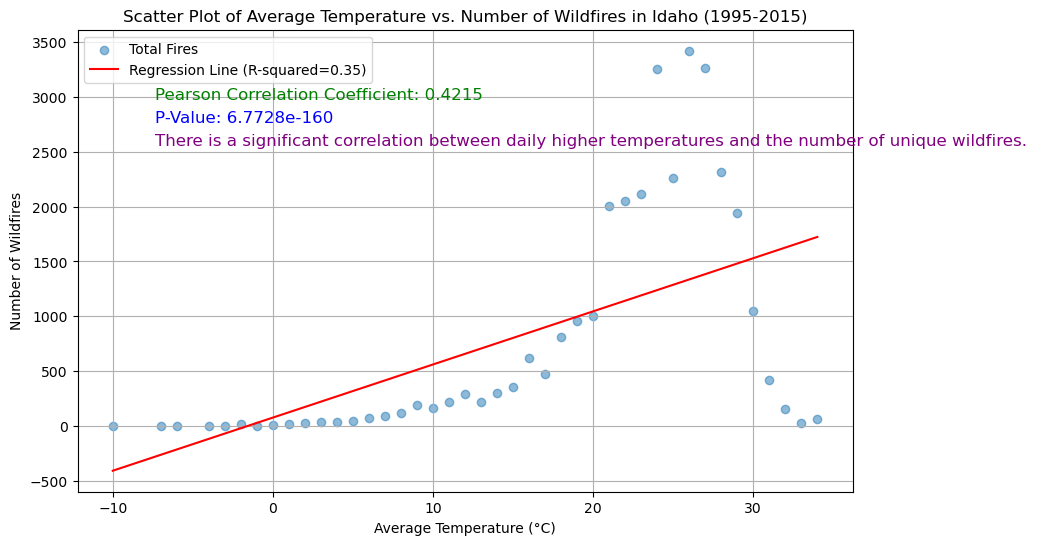

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the 'date' column to datetime format
merged_data_idaho['date'] = pd.to_datetime(merged_data_idaho['date'])

# Filter the data for oregon and the specified time frame (1995-2015)
idaho_data = merged_data_idaho[(merged_data_idaho['date'].dt.year >= 1995) & (merged_data_idaho['date'].dt.year <= 2015)]

# Round temperatures to the nearest integer
idaho_data['average_temp_c_rounded'] = idaho_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = idaho_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c',
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Provided Pearson Correlation Coefficient and P-Value
#Pearson-Korrelationskoeffizient für Idaho: 0.4215444385576765
#p-Wert für Idaho: 6.772773392945824e-160

pearson_corr_coeff = 0.4215444385576765
p_value = 6.772773392945824e-160

plt.scatter(x, y, label=f'Total Fires', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires in Idaho (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the provided Pearson Correlation Coefficient and P-Value
plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'P-Value: {p_value:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    significance_message = "There is a significant correlation between daily higher temperatures and the number of unique wildfires."
else:
    significance_message = "There is no significant correlation between daily higher temperatures and the number of unique wildfires."

plt.annotate(significance_message, (0.1, 0.75), xycoords='axes fraction', fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

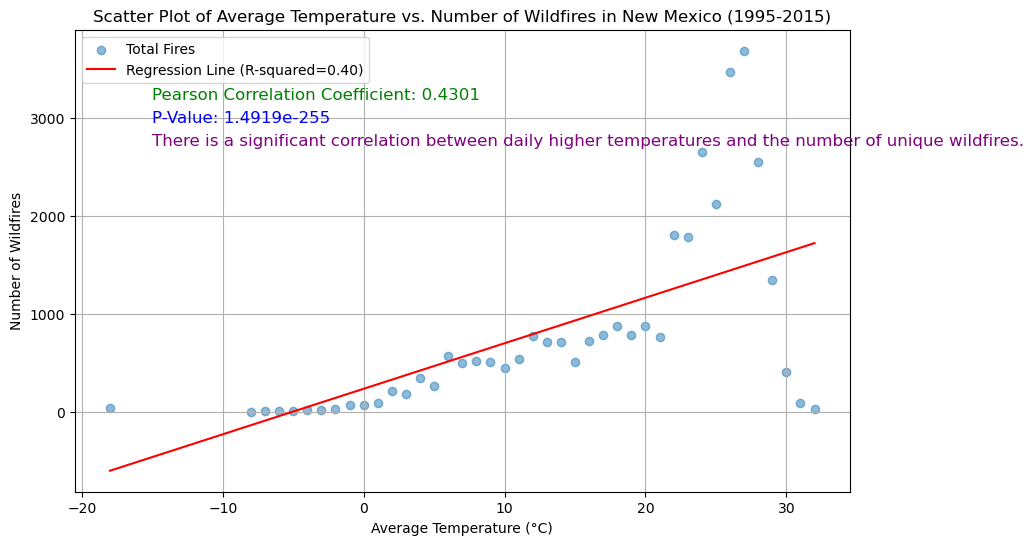

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the 'date' column to datetime format
merged_data_newmexico['date'] = pd.to_datetime(merged_data_newmexico['date'])

# Filter the data for oregon and the specified time frame (1995-2015)
newmexico_data = merged_data_newmexico[(merged_data_newmexico['date'].dt.year >= 1995) & (merged_data_newmexico['date'].dt.year <= 2015)]

# Round temperatures to the nearest integer
newmexico_data['average_temp_c_rounded'] = newmexico_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = newmexico_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c',
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Provided Pearson Correlation Coefficient and P-Value
#Pearson-Korrelationskoeffizient für New Mexico: 0.4301281346983329
#p-Wert für New Mexico: 1.4918540350074306e-255

pearson_corr_coeff = 0.4301281346983329
p_value = 1.4918540350074306e-255

plt.scatter(x, y, label=f'Total Fires', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires in New Mexico (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the provided Pearson Correlation Coefficient and P-Value
plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'P-Value: {p_value:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value < alpha:
    significance_message = "There is a significant correlation between daily higher temperatures and the number of unique wildfires."
else:
    significance_message = "There is no significant correlation between daily higher temperatures and the number of unique wildfires."

plt.annotate(significance_message, (0.1, 0.75), xycoords='axes fraction', fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

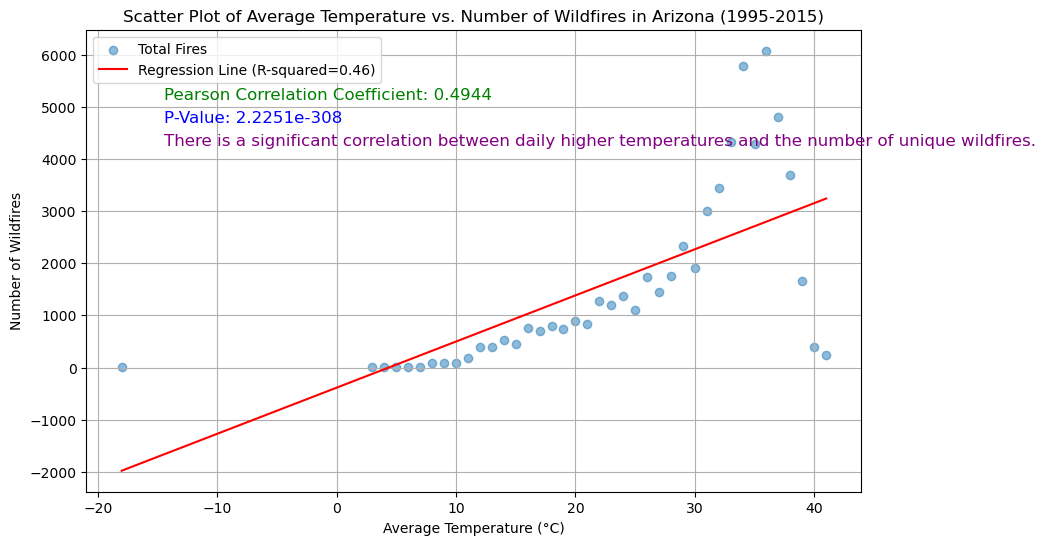

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Convert the 'date' column to datetime format
merged_data_arizona['date'] = pd.to_datetime(merged_data_arizona['date'])

# Filter the data for oregon and the specified time frame (1995-2015)
arizona_data = merged_data_arizona[(merged_data_arizona['date'].dt.year >= 1995) & (merged_data_arizona['date'].dt.year <= 2015)]

# Round temperatures to the nearest integer
arizona_data['average_temp_c_rounded'] = arizona_data['average_temp_c'].round().astype(int)  # Corrected syntax

# Group by rounded temperature and sum the number of wildfires
average_temp_c_rounded = arizona_data.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c',
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Scatter plot with a regression line
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Provided Pearson Correlation Coefficient and P-Value

#Korrelationskoeffizient (Pearson) für Arizona: 0.49441910023955804
#P-Wert (Pearson) für Arizona/ p_value_arizona : 2.2250738585072014e-308 


pearson_corr_coeff = 0.49441910023955804
p_value_arizona = 2.2250738585072014e-308 

plt.scatter(x, y, label=f'Total Fires', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires in Arizona (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the provided Pearson Correlation Coefficient and P-Value
plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'P-Value: {p_value_arizona:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

# Check if the correlation is statistically significant at a significance level of 0.05
alpha = 0.05
if p_value_arizona < alpha:
    significance_message = "There is a significant correlation between daily higher temperatures and the number of unique wildfires."
else:
    significance_message = "There is no significant correlation between daily higher temperatures and the number of unique wildfires."

plt.annotate(significance_message, (0.1, 0.75), xycoords='axes fraction', fontsize=12, color='purple')

plt.legend()
plt.grid(True)
plt.show()

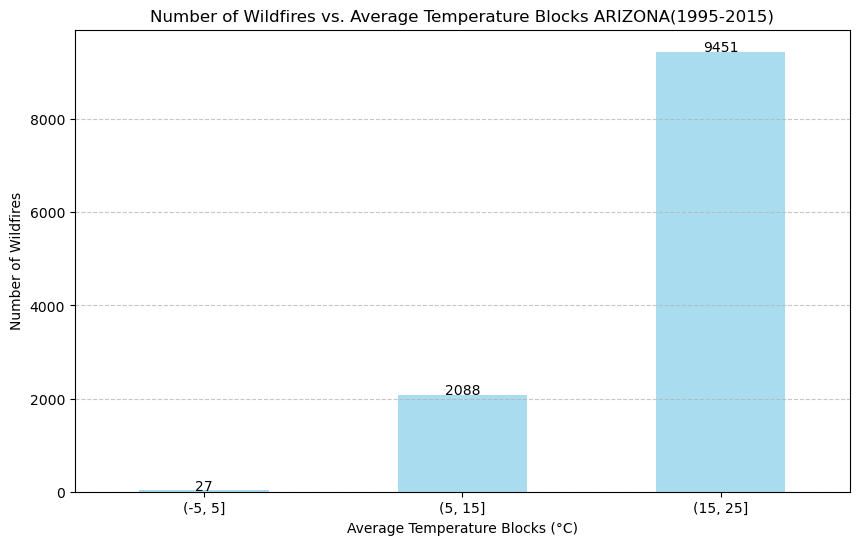

In [42]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Create temperature blocks
temperature_blocks = [-5, 5, 15, 25]

# Categorize average temperatures into blocks
merged_data_arizona['Temp Block'] = pd.cut(merged_data_arizona['average_temp_c'], bins=temperature_blocks)

# Calculate the number of wildfires in each temperature block
block_counts = merged_data_arizona.groupby('Temp Block')['Number of Wildfires'].sum()

# Bar chart
plt.figure(figsize=(10, 6))
block_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Wildfires vs. Average Temperature Blocks ARIZONA(1995-2015)')
plt.xlabel('Average Temperature Blocks (°C)')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for x, y in enumerate(block_counts):
    plt.text(x, y + 10, str(y), ha='center')

plt.show()

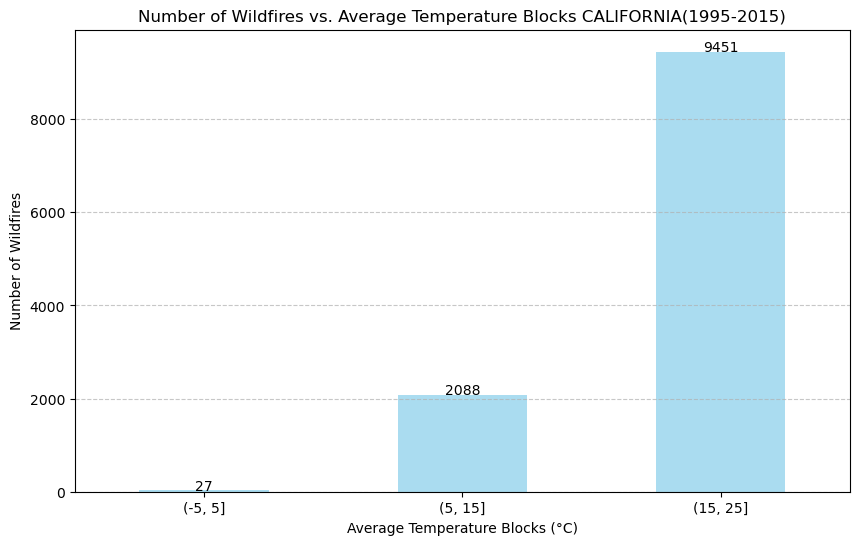

In [44]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Create temperature blocks
temperature_blocks = [-5, 5, 15, 25]

# Categorize average temperatures into blocks
merged_data_california['Temp Block'] = pd.cut(merged_data_california['average_temp_c'], bins=temperature_blocks)

# Calculate the number of wildfires in each temperature block
block_counts = merged_data_arizona.groupby('Temp Block')['Number of Wildfires'].sum()

# Bar chart
plt.figure(figsize=(10, 6))
block_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Wildfires vs. Average Temperature Blocks CALIFORNIA(1995-2015)')
plt.xlabel('Average Temperature Blocks (°C)')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for x, y in enumerate(block_counts):
    plt.text(x, y + 10, str(y), ha='center')

plt.show()